In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

download data set

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-12-21 09:52:36--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.07s   

2020-12-21 09:52:37 (304 KB/s) - ‘loan_train.csv’ saved [23101/23101]



# import data

In [3]:
df = pd.read_csv('loan_train.csv', sep=',')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

In [5]:
#converting date

In [6]:
df['effective_date']=pd.to_datetime(df['effective_date'])
df['due_date']=pd.to_datetime(df['due_date'])
df.head(400)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male


In [7]:
# visualization

In [8]:
df.isna().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

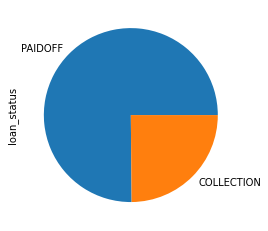

In [9]:
df['loan_status'].value_counts().plot(kind='pie')

In [10]:
#we can see that almost 3/4 of data was paid off and 1/4 was collection

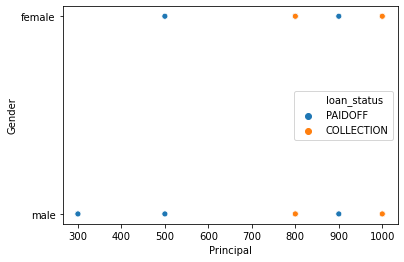

In [11]:

sns.scatterplot(x='Principal',y='Gender',hue='loan_status',data=df)

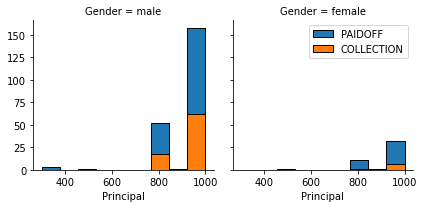

In [12]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status")
g.map(plt.hist, 'Principal', bins=bins, ec="k")
plt.legend()
plt.show()

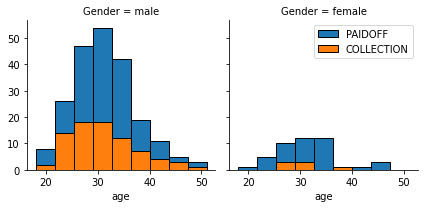

In [13]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status")
g.map(plt.hist, 'age', bins=bins, ec="k")
plt.legend()
plt.show()

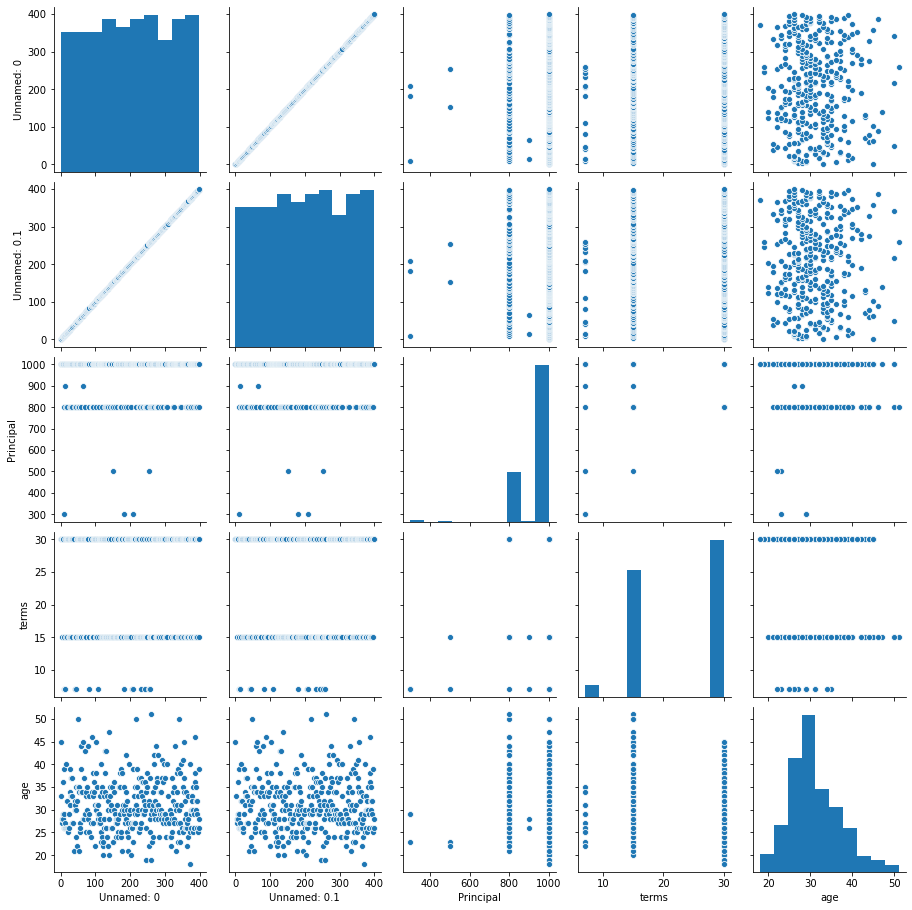

In [14]:
sns.pairplot(df)

In [15]:
#preprocessing


In [16]:
#day of the week people get the loan

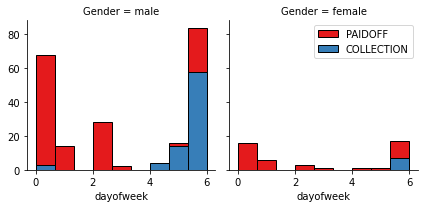

In [17]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [18]:
#ppl who got loan at end of week mostly hasn't paid off

In [19]:
#Feature binarization to set a threshold values less then day 4

In [20]:
df['Weekend']=np.where(df['dayofweek']>3,1,0)

In [21]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [22]:
#Convert Categorical features to numerical values

In [23]:
# -gender

In [24]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [25]:
#replacing male ->0 female->1

In [26]:
df1=df.copy()
df1.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [27]:
df1['Gender'].replace(['male','female'],[0,1],inplace=True)

In [28]:
df1.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [29]:
df1.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [30]:
#one hot encoding

In [31]:
Feature = df1[['Principal','terms','age','Gender','Weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,Weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [32]:
X=Feature

In [33]:
y = df.iloc[:,-1]

In [34]:
y[0:5]

0    0
1    0
2    0
3    1
4    1
Name: Weekend, dtype: int64

In [35]:
from sklearn import preprocessing

In [36]:
X= preprocessing.StandardScaler().fit(X).transform(X)

In [37]:
#Classification

In [78]:

import warnings
warnings.filterwarnings('ignore')

In [80]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [81]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [82]:
#knn

In [83]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=3)

In [84]:
yhat = kNN_model.predict(X_test)
yhat[0:5]

array([1, 1, 0, 0, 0])

In [85]:
# Best k
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.98571429, 0.98571429, 0.98571429, 0.97142857, 0.95714286,
       0.95714286, 0.95714286, 0.95714286, 0.97142857, 0.95714286,
       0.97142857, 0.97142857, 0.98571429, 0.98571429])

In [86]:

# Building the model again, using k=7
from sklearn.neighbors import KNeighborsClassifier
k = 7
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=7)

In [87]:
#Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [101]:
yhat = DT_model.predict(X_test)
yhat

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0])

In [102]:
from sklearn.metrics import accuracy_score

In [106]:
accuracy_score(y_test, DT_model.predict(X_test))

1.0

In [90]:
#Support Vector Machine

In [112]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

In [113]:
from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

In [115]:
acc_list = np.zeros(4)
f1_list = np.zeros(4)
jacc_list = np.zeros(4)

for i in range(len(kernels)):
    svm_ = SVC(kernel=kernels[i]).fit(X_train, y_train)
    y_hat = svm_.predict(X_test)
    acc_list[i] = accuracy_score(y_test, y_hat)
    f1_list[i] = f1_score(y_test, y_hat, average='weighted')
    jacc_list[i] = jaccard_score(y_test, y_hat)

svm_score_matrix = pd.DataFrame()
svm_score_matrix['Accuracy'] = acc_list
svm_score_matrix['F1'] = f1_list
svm_score_matrix['Jaccard'] = jacc_list
svm_score_matrix.index = kernels
svm_score_matrix

,Accuracy,F1,Jaccard
linear,1.000000,1.000000,1.00000
poly,1.000000,1.000000,1.00000
rbf,1.000000,1.000000,1.00000
sigmoid,0.957143,0.956941,0.93617


In [116]:
# linear kernel give the best result
SVM_model = SVC(kernel='linear')
SVM_model.fit(X_train, y_train)

SVC(kernel='linear')

In [117]:
#Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression

In [122]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'];
regularizations = [0.001, 0.01, 0.1, 1, 10]
LR_score_matrix = pd.DataFrame()

for i in range(len(solvers)):
    solv_col = np.zeros(len(regularizations), dtype=np.object)
    for j in range(len(regularizations)):
        logreg = LogisticRegression(C=regularizations[j], solver=solvers[i]).fit(X_train, y_train)
        y_hat = logreg.predict(X_test)
        y_hat_prob = logreg.predict_proba(X_test)
        acc_score = accuracy_score(y_test, y_hat)
        f1_score = f1_score(y_test, y_hat, average='weighted')
        jacc_score = jaccard_score(y_test, y_hat)
        logloss = log_loss(y_test, y_hat_prob)
        solv_col[j] = "Acc: {:.3f}; F1: {:.3f}; Jac: {:.3f}; LogLos: {:.3f}".format(acc_score, f1_score, jacc_score, logloss)
    LR_score_matrix[solvers[i]] = solv_col
LR_score_matrix.index = regularizations
LR_score_matrix

TypeError: 'numpy.float64' object is not callable

In [123]:
LogisticRegression_model = LogisticRegression(C=0.01, solver='sag')
LogisticRegression_model.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='sag')

In [125]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [126]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-12-21 11:21:03--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2020-12-21 11:21:03 (57.7 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [128]:
#Load Test set for evaluation

In [129]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [130]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [131]:
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x > 3) else 0)

In [132]:
X_testset = test_df[['Principal','terms','age','Gender','weekend']]
X_testset = pd.concat([X_testset, pd.get_dummies(test_df['education'])], axis=1)
X_testset.drop(['Master or Above'], axis = 1,inplace=True)
X_testset = preprocessing.StandardScaler().fit(X_testset).transform(X_testset)

y_testset = test_df['loan_status'].values